# Project - Digital Marketing Campaign Conversion 
## Introduction 

Hello, Welcome to the Digital Marketing Campaign Conversion project for marketing dataset.<br>
In this project, we aim to optimize campaign strategies by identifying customers most likely to convert, ultimately enhancing marketing effectiveness and reducing costs.<br>


**Problem Statement** <br>
Marketers struggle to allocate budgets effectively due to uncertainty about customer behavior.<br>
Misallocations lead to wasted resources and missed revenue opportunities. By predicting customer conversions, this project seeks to minimize these inefficiencies and guide data-driven decision-making for better campaign outcomes.<br>

_**The Objective of this project are as follows:**_ <br>
_**1. Develop a robust predictive model: Accurately predict whether a customer will convert based on demographic and engagement features.**_<br>
_**2. Optimize marketing strategies: Improve campaign targeting, increase conversion rates, and maximize return on advertising spend (ROAS).**_<br>

**Dataset Description** <br>
The dataset contains information on customers, including those who have converted (1) and those who have not converted (0).<br>

**Key dataset specifications:** 8000 rows & 20 columns


The dataset includes the following attributes:
| Attribute        | Description                                                   |
|:------------------|:---------------------------------------------------------------|
| CustomerID           | A unique identifier for each customer.                    |
| Age                  | The customer's age.                                       |
| Gender               | The customer's gender (Male or Female).                   |
| Income               | Annual income of the customer in USD.                     |
| CampaignChannel      | The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).|
| CampaignType         | Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).| 
| AdSpend              | Amount spent on the marketing campaign in USD.            |
| ClickThroughRate     | Rate at which customers click on the marketing content.   |
| ConversionRate       | Rate at which clicks convert to desired actions (e.g., purchases).|
| AdvertisingPlatform  | Confidential.     |
| AdvertisingTool      | Confidential.     |
| WebsiteVisits        | Number of visits to the website.  |
| PagesPerVisit        | Average number of pages visited per session.              |
| TimeOnSite           | Average time spent on the website per visit (in minutes). |
| SocialShares         | Number of times the marketing content was shared on social media.|
| EmailOpens           | Number of times marketing emails were opened.             |
| EmailClicks          | Number of times links in marketing emails were clicked.   |
| PreviousPurchases    | Number of previous purchases made by the customer.        |
| LoyaltyPoints        | Number of loyalty points accumulated by the customer.     |
| Conversion           | Binary variable indicating whether the customer converted (1) or not (0).|


**Type of ML Model** <br>
This project involves **classification** using **supervised machine learning** as we have to **predict** whether a customer will convert or not based on the **given features**.

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
!pip install catboost
from catboost import CatBoostClassifier
from sklearn import model_selection
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)  # Imports metrics for evaluating model performance.
import joblib
import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset

In [6]:
df=pd.read_csv("digital_marketing_campaign_dataset.csv")
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


## Exploratory Data Analysis (EDA)

In this I am  performing **EDA and Data Wrangling concurrently**, So as to iteratively explore the data, identify data quality issues, and address them through preprocessing steps, ensuring that our analysis is based on clean and reliable data.

In [10]:
rows = df.shape[0]
column = df.shape[1]
print(f"Dataset has {rows} Rows and {column} Columns")
df.shape

Dataset has 8000 Rows and 20 Columns


(8000, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

**Insights:** <br>
   * No null values are there 
   * data types are also appropriate

In [15]:
df.duplicated().sum()

0

**Insight:** No duplicates are there

### Data Cleaning

**removing unnecessary Columns**

In [20]:
df.drop(["CustomerID","AdvertisingPlatform","AdvertisingTool"],axis=1, inplace=True)
df

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0
7996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0
7997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,1
7998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,1


### Checking Outliers

**Summary Statistics**

In [24]:
df.describe()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


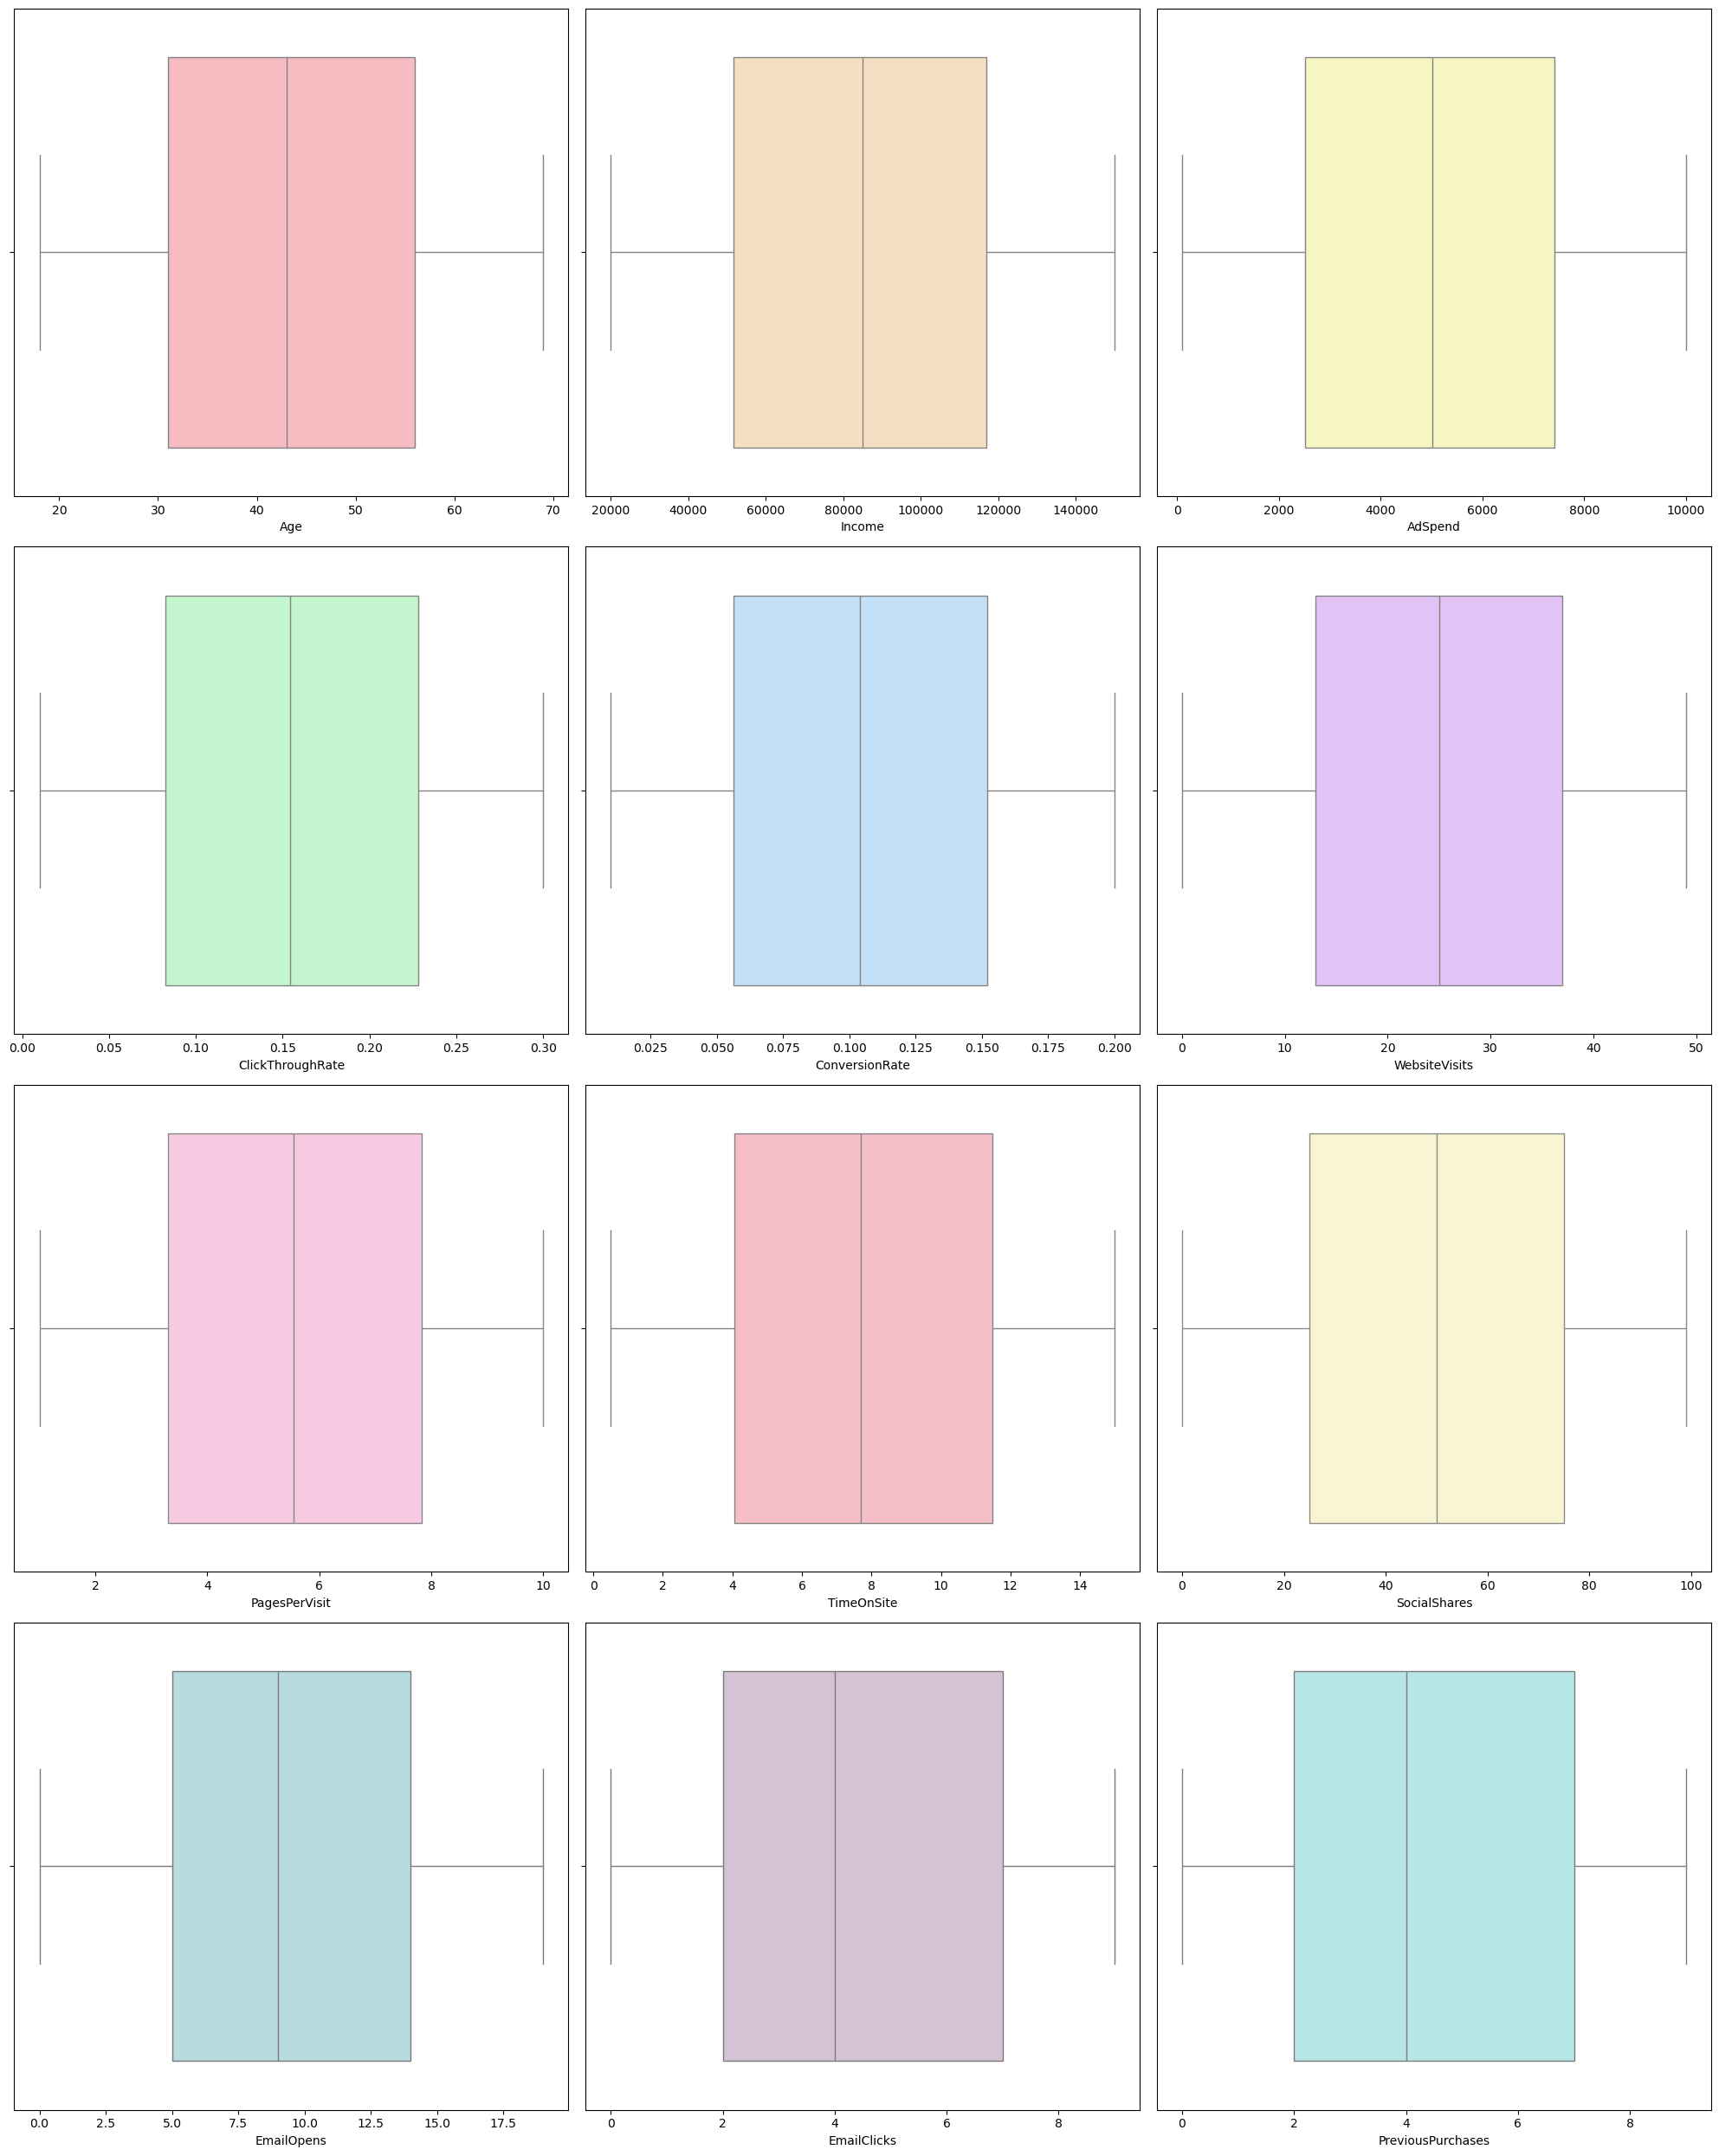

In [26]:
pastel_colors = [
    "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF",
    "#E2BAFF", "#FFC2E2", "#FFB6C1", "#FFFACD", "#B0E0E6",
    "#D8BFD8", "#AFEEEE"
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))
axes = axes.flatten()

# Plot each box plot with a specific color
sns.boxplot(x=df['Age'], ax=axes[0], color=pastel_colors[0])
sns.boxplot(x=df['Income'], ax=axes[1], color=pastel_colors[1])
sns.boxplot(x=df['AdSpend'], ax=axes[2], color=pastel_colors[2])
sns.boxplot(x=df['ClickThroughRate'], ax=axes[3], color=pastel_colors[3])
sns.boxplot(x=df['ConversionRate'], ax=axes[4], color=pastel_colors[4])
sns.boxplot(x=df['WebsiteVisits'], ax=axes[5], color=pastel_colors[5])
sns.boxplot(x=df['PagesPerVisit'], ax=axes[6], color=pastel_colors[6])
sns.boxplot(x=df['TimeOnSite'], ax=axes[7], color=pastel_colors[7])
sns.boxplot(x=df['SocialShares'], ax=axes[8], color=pastel_colors[8])
sns.boxplot(x=df['EmailOpens'], ax=axes[9], color=pastel_colors[9])
sns.boxplot(x=df['EmailClicks'], ax=axes[10], color=pastel_colors[10])
sns.boxplot(x=df['PreviousPurchases'], ax=axes[11], color=pastel_colors[11])
plt.tight_layout()
plt.show()

**Inferences** <br>
**No** Outliers were found in the dataset

### Univariate Analysis

#### Class Balance of Target Variable 

Conversion
1    7012
0     988
Name: count, dtype: int64
Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64


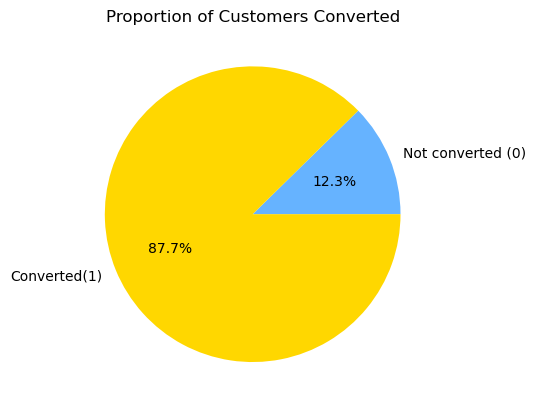

In [30]:
print(df['Conversion'].value_counts())
balance = df['Conversion'].value_counts(normalize = True)
print(balance)

colors = ['#66B3FF','#FFD700' ]

labels = ["Not converted (0)", 'Converted(1)']
plt.pie([balance[0],balance[1]], labels = labels,colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Customers Converted')
plt.show()

**Inferences**:<br>
The dataset is imbalance

#### Uniques

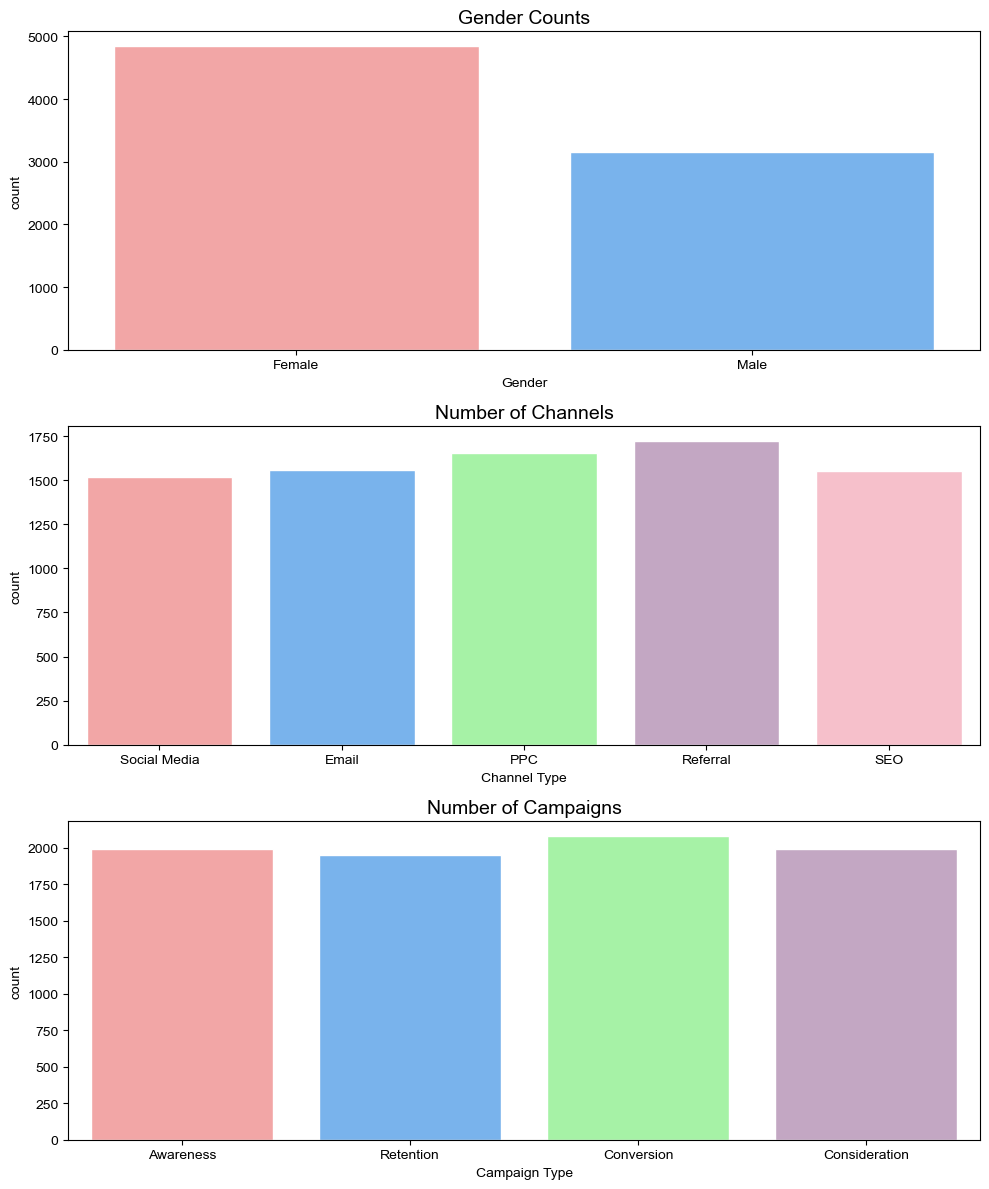

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
sns.set_style("whitegrid")

# Custom palette
custom_palette = ['#FF9999', '#66B3FF', '#99FF99','#C8A2C8','#FFB7C5'] 

# 'Gender'
sns.countplot(x='Gender', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Gender Counts',fontsize=14)
axes[0].set_xlabel('Gender')

# 'CampaignChannel'
sns.countplot(x='CampaignChannel', data=df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Number of Channels',fontsize=14)
axes[1].set_xlabel('Channel Type')

# 'CampaignType'
sns.countplot(x='CampaignType', data=df, ax=axes[2], palette=custom_palette)
axes[2].set_title('Number of Campaigns',fontsize=14)
axes[2].set_xlabel('Campaign Type')

plt.tight_layout()
plt.show()

**Inferences**

* Female customers are slightly **more** than Male ones. 
* **Referral** is the most used channel by the customers, followed by PPC.
* The majority of customers have opted for **Conversion** Campaign.

#### Returning Visitors Vs Non-Returning Visitors

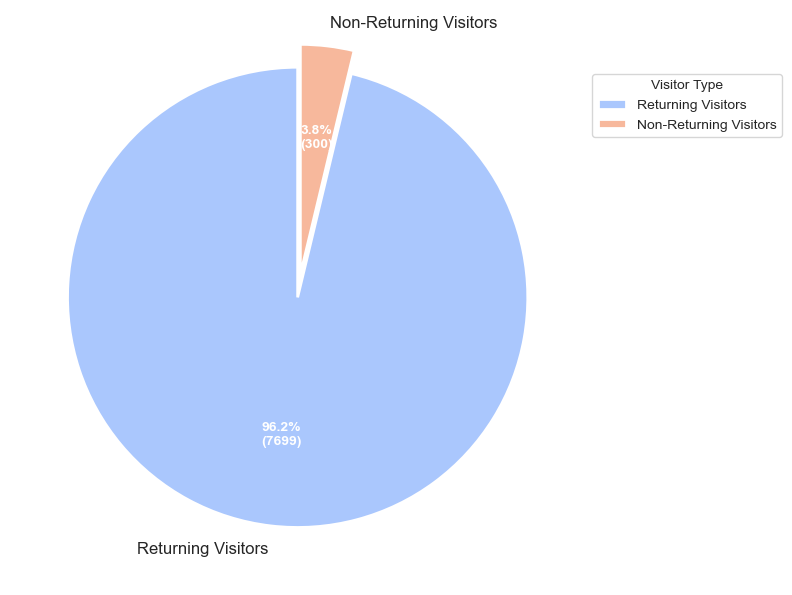

In [39]:
# Sample data
returning_visitors = len(df[df['WebsiteVisits'] > 1])
non_returning_visitors = len(df) - returning_visitors

data = {
    "Visitor Type": ["Returning Visitors", "Non-Returning Visitors"],
    "Number of Visitors": [returning_visitors, non_returning_visitors]
}

# Define colors using Seaborn's palette
colors = sns.color_palette("coolwarm", len(data["Visitor Type"]))

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    data["Number of Visitors"],
    labels=data["Visitor Type"],
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(data["Number of Visitors"]))})',
    startangle=90,
    explode=[0, 0.1],  # Emphasize Non-Returning Visitors
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Style the text
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=12)

# Add a legend outside the chart
plt.legend(
    data["Visitor Type"],
    title="Visitor Type",
    loc="upper left",
    bbox_to_anchor=(1, 0.9),
    fontsize=10
)

# Display the chart
plt.tight_layout()
plt.show()

**Inferences**<br>
**96.2%** customers are returning after visting the websites implementing that a high return rate

#### Repeat Purchase Distribution

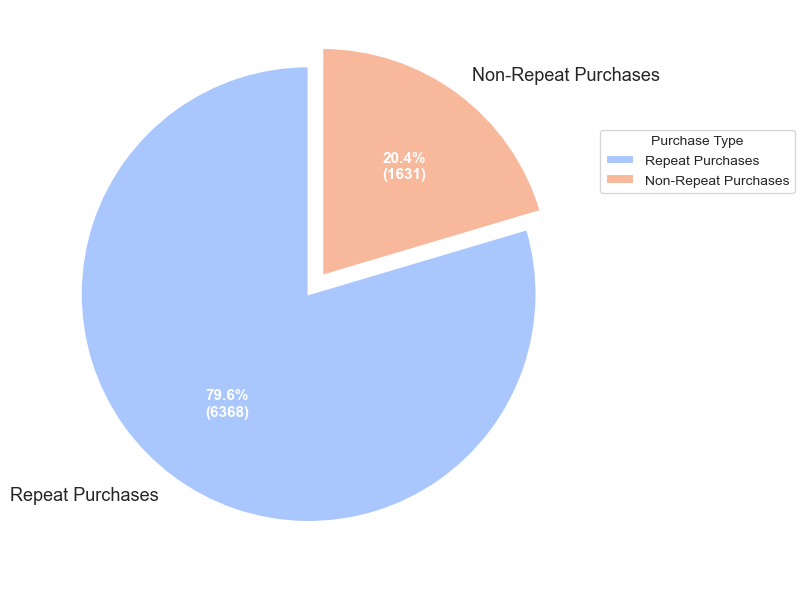

In [43]:
# Sample data

repeat_purchase_count = len(df[df['PreviousPurchases'] > 1])
non_repeat_purchase_count = len(df) - repeat_purchase_count

data = {
    "Purchase Type": ["Repeat Purchases", "Non-Repeat Purchases"],
    "Count": [repeat_purchase_count, non_repeat_purchase_count]
}

# Define colors using Seaborn's palette
colors = sns.color_palette("coolwarm", len(data["Purchase Type"]))

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    data["Count"],
    labels=data["Purchase Type"],
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(data["Count"]))})',
    startangle=90,
    explode=[0, 0.1],  # Highlight "Non-Repeat Purchases"
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Style the text
plt.setp(autotexts, size=11, weight="bold", color="white")
plt.setp(texts, size=13)

# Add a legend
plt.legend(
    data["Purchase Type"],
    title="Purchase Type",
    loc="best",
    bbox_to_anchor=(1, 0.8),
    fontsize=10
)

# Ensure tight layout
plt.tight_layout()

# Show the chart
plt.show()

**Inferences**<br>
**79.6%** customers are repeating their purchases while **20.4%** are not re-purchasing.

### Bivariate Analysis

#### Customer Demographic Analysis

##### Age Vs Conversion

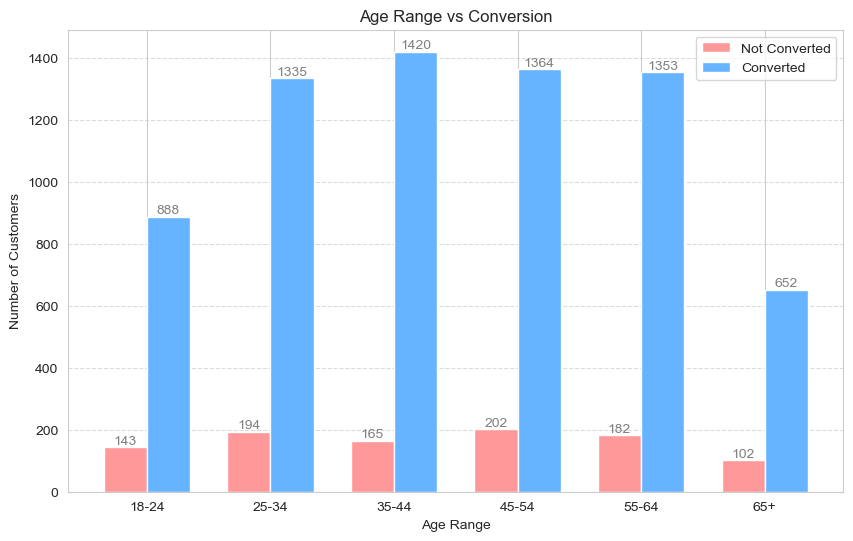

In [49]:
# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age range and conversion status, then count
age_conversions = df.groupby(['Age Range', 'Conversion'])['Age'].count().unstack(fill_value=0)

x = np.arange(len(age_conversions.index))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, age_conversions[0], width, label='Not Converted', color='#FF9999')
rects2 = ax.bar(x + width/2, age_conversions[1], width, label='Converted', color= '#66B3FF')

# Labels and Title
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Customers')
ax.set_title('Age Range vs Conversion')
ax.set_xticks(x)
ax.set_xticklabels(age_conversions.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, f'{height}',
        ha='center', va='bottom', fontsize=10, color='#808080'
    )

ax.legend()
plt.xticks(rotation=0)
plt.show()

**Inferences**

* **Highest** conversions are from age group **35-44**
* Age group **65+** has the minimum number of conversions

##### Income Vs Conversion 

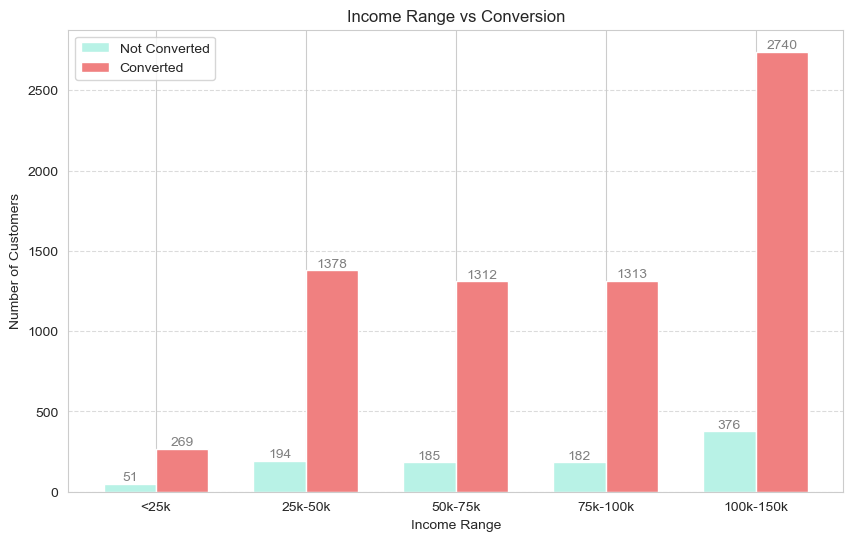

In [53]:
# Define income bins and labels
income_bins = [0, 25000, 50000, 75000, 100000, 150000]
income_labels = ['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k']

df['Income Range'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)
income_conversions = df.groupby(['Income Range', 'Conversion'])['Income'].count().unstack(fill_value=0)

x = np.arange(len(income_conversions.index))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, income_conversions[0], width, label='Not Converted', color='#B8F2E6')
rects2 = ax.bar(x + width/2, income_conversions[1], width, label='Converted', color='#F08080')

# Labels and Title
ax.set_xlabel('Income Range')
ax.set_ylabel('Number of Customers')
ax.set_title('Income Range vs Conversion')
ax.set_xticks(x)
ax.set_xticklabels(income_conversions.index)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, f'{height}',
        ha='center', va='bottom', fontsize=10, color='#808080'
    )

ax.legend()
plt.xticks(rotation=0)
plt.show()

**Inferences**

* Customers with income in the range of **100K-150K** have the **most** conversions
* There is **low** conversions from customers with income **less than 25K**
* This means that **more** the income ,**more** is the conversion by the customers

##### Gender Vs Conversions

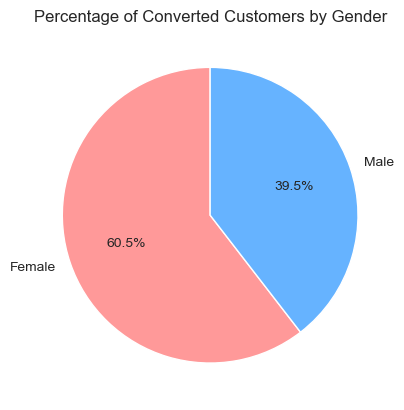

In [56]:
# Filter converted customers
converted_customers = df[df['Conversion'] == 1]

# Count the number of converted customers by gender
gender_distribution = converted_customers['Gender'].value_counts()

# Create a pie chart
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff'],  # Optional color scheme
    startangle=90
)

# Set the title
plt.title('Percentage of Converted Customers by Gender')

# Display the plot
plt.show()

**Inferences**

More **Female** customers were converted than **Male**

#### Customer Engagement Metrics

##### Website Visits

* **Website Visits by Campaign Type**

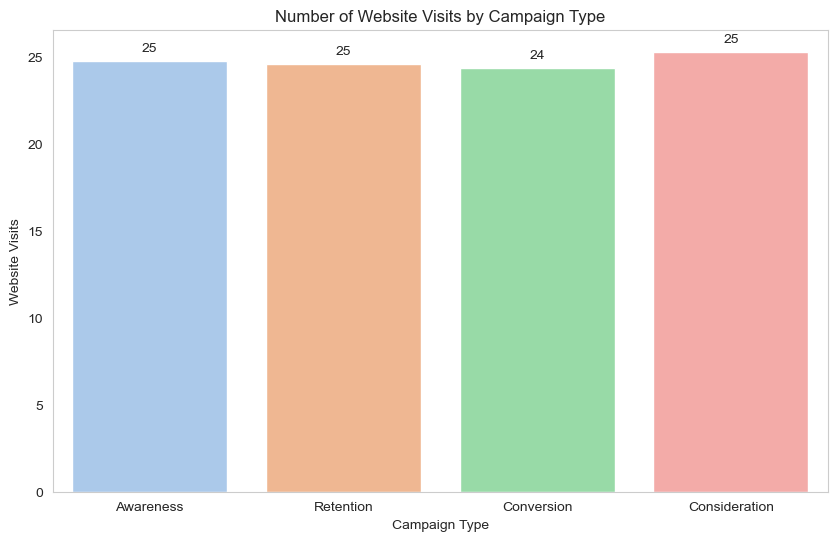

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="WebsiteVisits", data=df, ci=None, palette='pastel')
plt.title('Number of Website Visits by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Website Visits')

# Adding average values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.grid(False)
plt.show()

**Inferences**<br>
* Same number of customers visit the website of **Awareness**,**Retention** and **Consideration** Campaigns.
* Less customers visit the website of **Conversion** Campaign than others.

* **Website Visits by Campaign Channel**

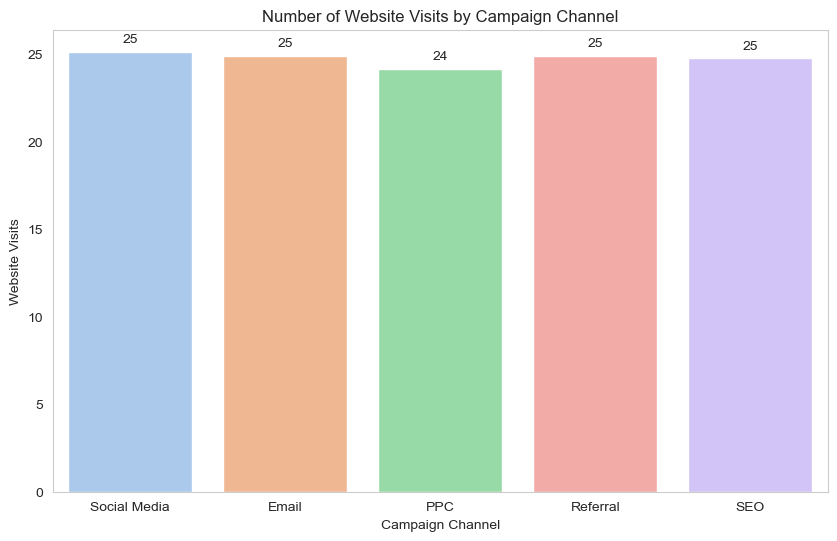

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignChannel", y="WebsiteVisits", data=df, ci=None, palette='pastel')
plt.title('Number of Website Visits by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Website Visits')

# Adding average values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.grid(False)
plt.show()

**Inferences**<br>
* Same number of customers visit the website through **Social Media** ,**Email** ,**Referral** ,**SEO**.
* Less customers visit the website through **PPC** than others.

##### Average Email Engagement by Conversion

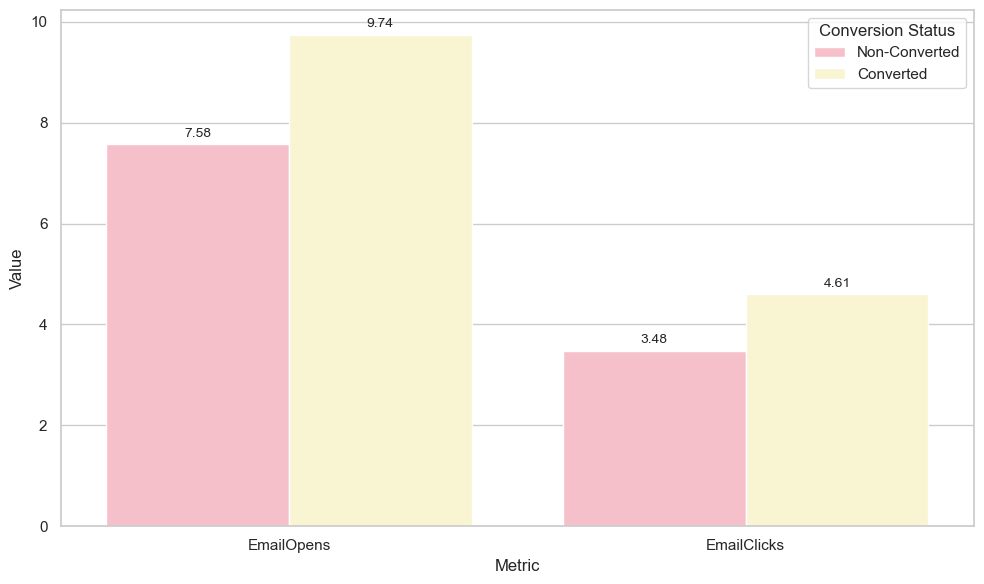

In [71]:
avg_email_engagement = df.groupby('Conversion')[['EmailOpens', 'EmailClicks']].mean().reset_index()
avg_email_engagement['Conversion'] = avg_email_engagement['Conversion'].map({1: 'Converted', 0: 'Non-Converted'})
avg_email_engagement = avg_email_engagement.melt(id_vars=['Conversion'], var_name='Metric', value_name='Value')

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create a color palette
palette = {'Converted': '#FFFACD', 'Non-Converted': '#FFB7C5'}

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_email_engagement,
    x='Metric',
    y='Value',
    hue='Conversion',
    palette=palette
)

# Annotate each bar with the value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Customize the legend
ax.legend(
    title="Conversion Status",
    title_fontsize=12,
    fontsize=11,
    loc="upper right",
    frameon=True
)

# Adjust layout for better spacing
plt.tight_layout()

# Show the chart
plt.show()

**Inferences**<br>
Customers who have been converted open and clicks **more Emails** than non converted customers 

##### Average Loyality Points by Conversion


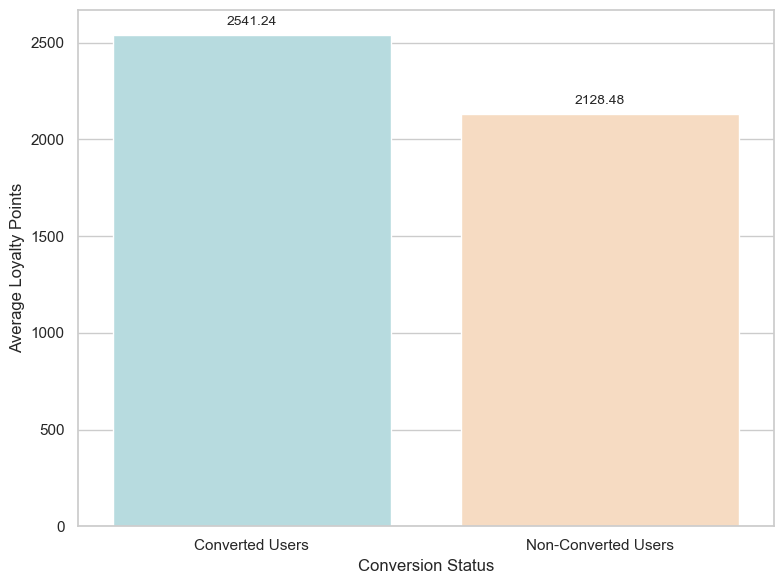

In [75]:
avg_loyalty_points_converted = df[df['Conversion'] == 1]['LoyaltyPoints'].mean()
avg_loyalty_points_non_converted = df[df['Conversion'] == 0]['LoyaltyPoints'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Loyalty Points": [avg_loyalty_points_converted, avg_loyalty_points_non_converted]
}

# Convert to DataFrame
data_df = pd.DataFrame(data)

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Define the color palette
palette = ['#B0E0E6','#FFDAB9']

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=data_df,
    x='Conversion Status',
    y='Average Loyalty Points',
    palette=palette
)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, label_type='edge', padding=5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Inferences**<br>
Converted Customers have **more** Loyalty Points than Non Converted Customers

#### Average Click Through Rate By Conversion

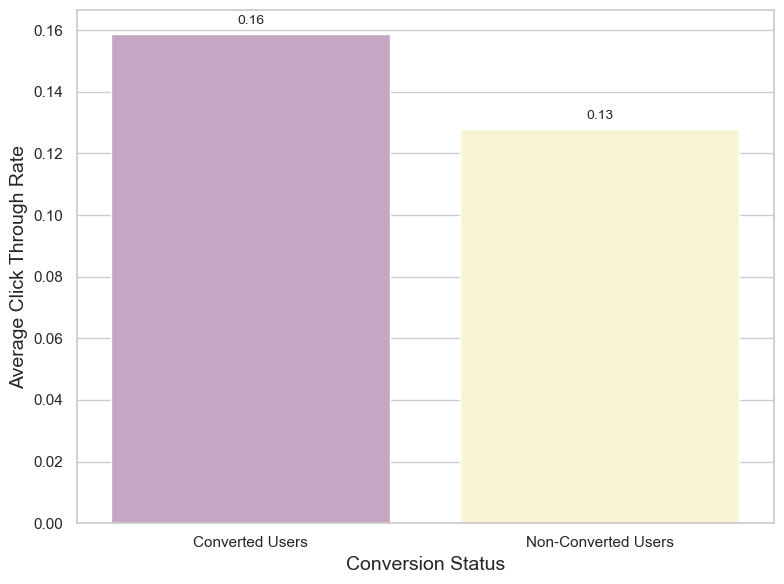

In [79]:
# Data preparation
avg_CTR_converted = df[df['Conversion'] == 1]['ClickThroughRate'].mean()
avg_CTR_non_converted = df[df['Conversion'] == 0]['ClickThroughRate'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average ClickThroughRate": [avg_CTR_converted, avg_CTR_non_converted]
}

# Convert to DataFrame
data_df = pd.DataFrame(data)

# Set the Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Define color palette with dark pastel shades
palette = ['#C8A2C8', '#FFFACD']  

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=data_df,
    x='Conversion Status',
    y='Average ClickThroughRate',
    palette=palette
)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, label_type='edge', padding=5)

# Add title and labels
ax.set_xlabel("Conversion Status", fontsize=14)
ax.set_ylabel("Average Click Through Rate", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Inferences**<br>
Converted Customers have **more** average CTR than Non Converted Customers

#### PagesPerVisit


* **Average PagesPerVisit By Conversion**


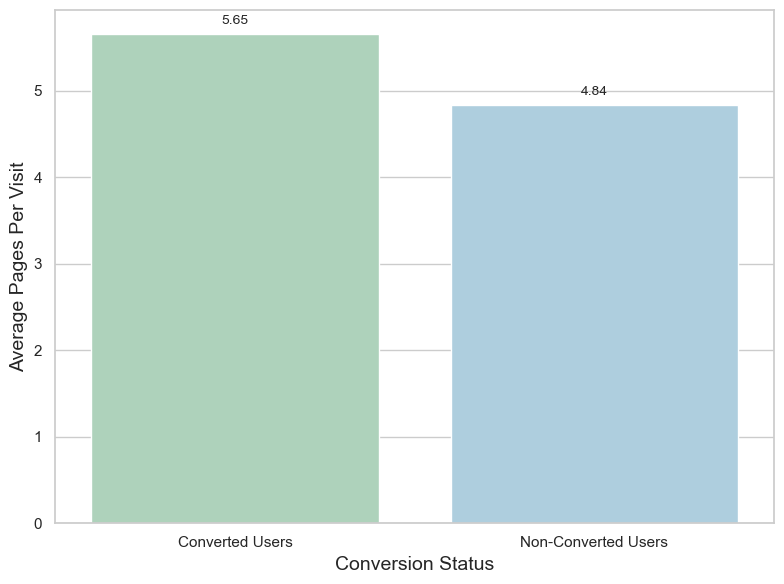

In [84]:
avg_pages_converted = df[df['Conversion'] == 1]['PagesPerVisit'].mean()
avg_pages_non_converted = df[df['Conversion'] == 0]['PagesPerVisit'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Pages Per Visit": [avg_pages_converted, avg_pages_non_converted]
}

# Convert data to a DataFrame
data_df = pd.DataFrame(data)

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Define a pastel color palette
palette = ['#A8D8B9', '#A6D1E6']  

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=data_df,
    x='Conversion Status',
    y='Average Pages Per Visit',
    palette=palette
)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, label_type='edge', padding=5)

# Add title and labels
ax.set_xlabel("Conversion Status", fontsize=14)
ax.set_ylabel("Average Pages Per Visit", fontsize=14)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Inferences**<br>
Converted Customers visits Pages **more** than Non Converted Customers

* **Average PagesPerVisit By Campaign Type**

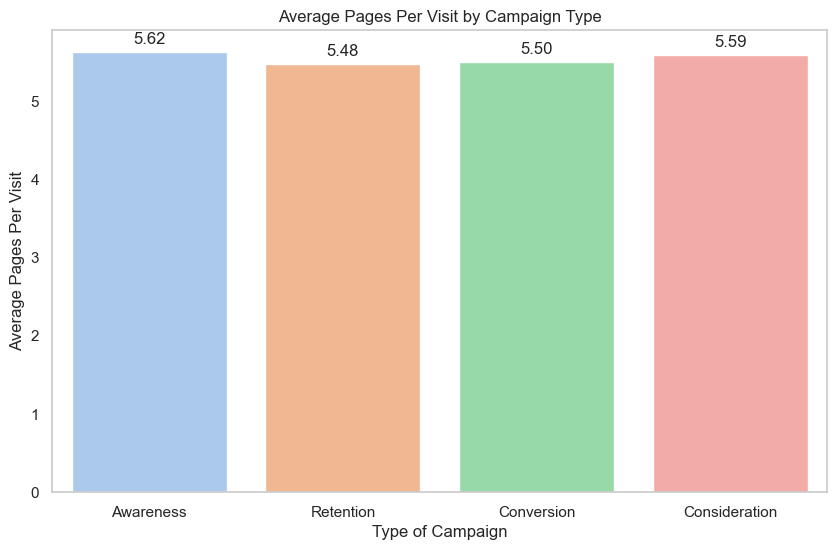

In [88]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="PagesPerVisit", data=df, ci=None, palette='pastel')
plt.title('Average Pages Per Visit by Campaign Type')
plt.xlabel('Type of Campaign')
plt.ylabel('Average Pages Per Visit')

# Adding average values ​​above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.grid(False)
plt.show()

**Inferences**<br>
* Customers visit **Awareness** Campaign pages **more** than the others.
* Visits to other Campaign Pages are also close to the maximum.

* **Average PagesPerVisit By Campaign Channel**

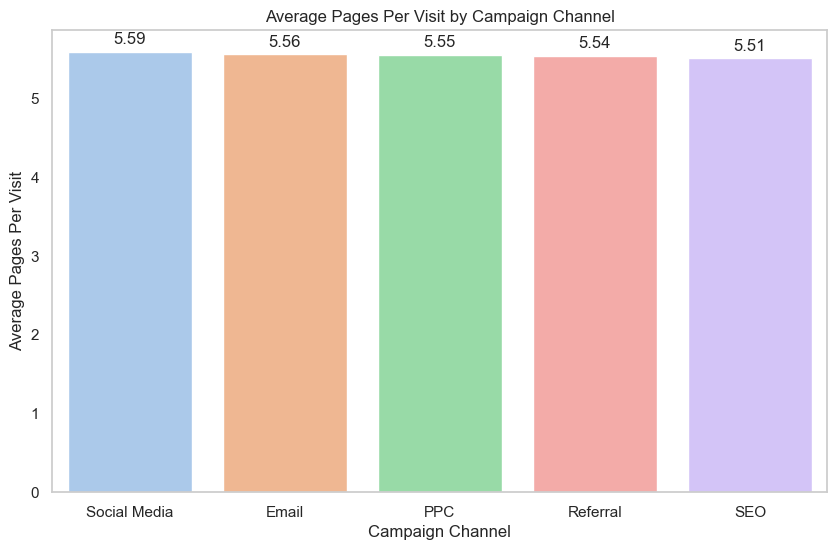

In [92]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignChannel", y="PagesPerVisit", data=df, ci=None, palette='pastel')
plt.title('Average Pages Per Visit by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Average Pages Per Visit')

# Adding average values ​​above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.grid(False)
plt.show()

**Inferences**<br>
* Customers visit campaigns mostly through **Social Media**.
* Visit to campaigns through other channels are also close to maximum.

* **Calculating Bounce Rate:**<br>
Calculate the bounce rate as the percentage of single-page visits

In [96]:
bounce_rate = (df['PagesPerVisit'] == 1).mean() * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 0.00%


A Bounce Rate of 0.00% in your marketing campaign data most likely indicates a data quality issue rather than a perfect campaign<br>
**Unrealistic Scenario:**<br>
It's highly improbable that every single visitor interacted with your website in some way. There will always be some visitors who leave immediately without any interaction.
**Tracking Issues:** <br>
A 0% bounce rate might suggest that your website analytics are not set up correctly or there might be glitches in data reporting. This could be due to faulty tracking codes or errors in how user interactions are captured

##### Average Time Spent on Site by Conversion

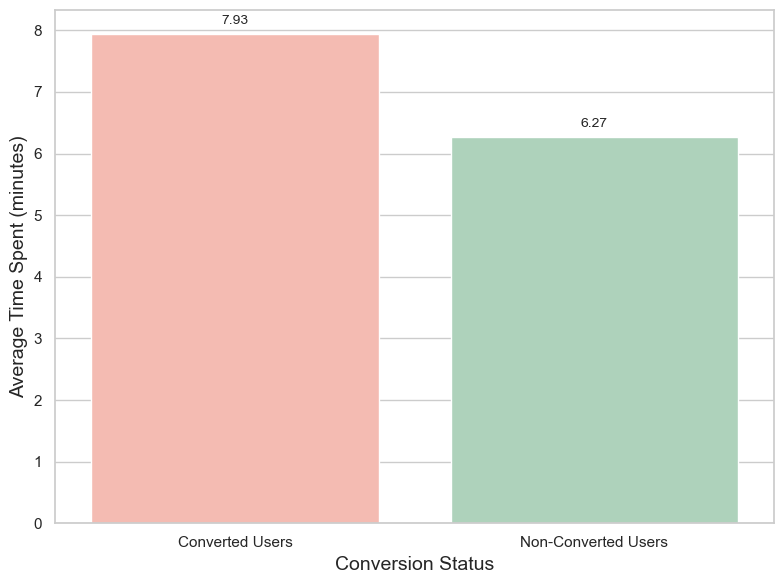

In [100]:
avg_time_converted = df[df['Conversion'] == 1]['TimeOnSite'].mean()
avg_time_non_converted = df[df['Conversion'] == 0]['TimeOnSite'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Time Spent (minutes)": [avg_time_converted, avg_time_non_converted]
}

# Convert to DataFrame
data_df = pd.DataFrame(data)

# Set the Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Define a pastel color palette
palette = ['#FFB3A7', '#A8D8B9']  # Soft pastel colors for the bars

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=data_df,
    x='Conversion Status',
    y='Average Time Spent (minutes)',
    palette=palette
)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, label_type='edge', padding=5)

# Add title and labels
ax.set_xlabel("Conversion Status", fontsize=14)
ax.set_ylabel("Average Time Spent (minutes)", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Inferences**<br>
Converted customers spend **more** time on website per visit than non - converted customers.

#### Average Social Shares by Conversion

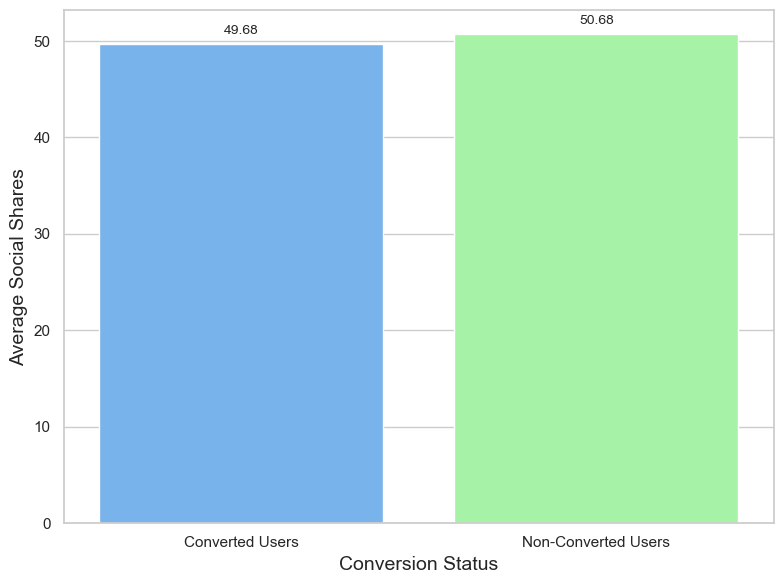

In [104]:
# Data preparation
avg_social_shares_converted = df[df['Conversion'] == 1]['SocialShares'].mean()
avg_social_shares_non_converted = df[df['Conversion'] == 0]['SocialShares'].mean()

data = {
    "Conversion Status": ["Converted Users", "Non-Converted Users"],
    "Average Social Shares": [avg_social_shares_converted, avg_social_shares_non_converted]
}

# Convert to DataFrame
data_df = pd.DataFrame(data)

# Set the Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Define the color palette with dark pastel shades
palette = ['#66B3FF', '#99FF99'] 

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=data_df,
    x='Conversion Status',
    y='Average Social Shares',
    palette=palette
)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, label_type='edge', padding=5)

# Add title and labels
ax.set_xlabel("Conversion Status", fontsize=14)
ax.set_ylabel("Average Social Shares", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Inferences**<br>
Converted Customers have slightly **less** Social Shares on social media than non converted customers.

#### Campaign Effectiveness Metrics

##### Conversions by Campaign Types

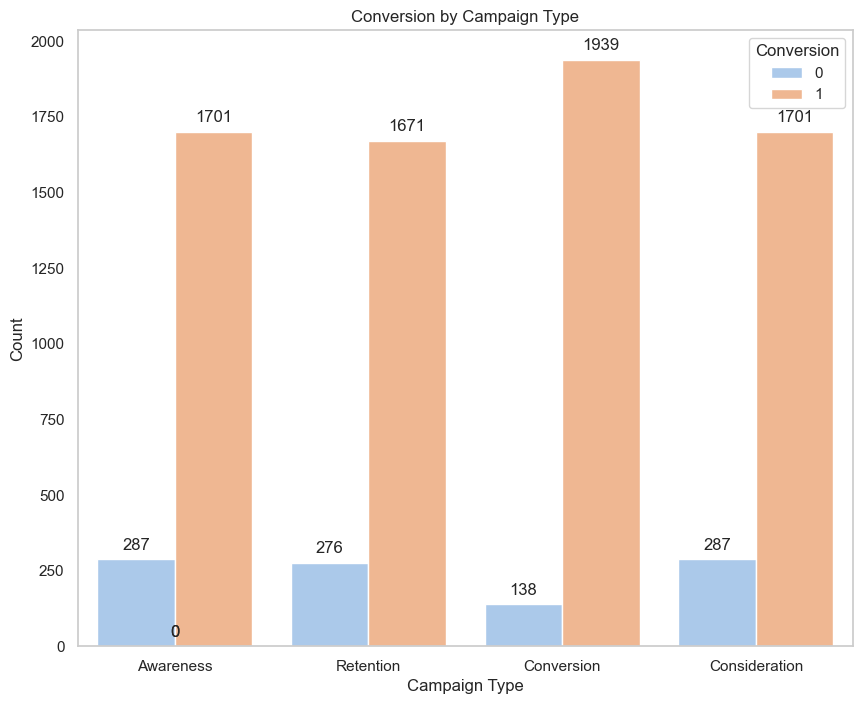

In [109]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='CampaignType', hue='Conversion', palette='pastel')
plt.title('Conversion by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.grid(False)
plt.show()

**Inferences**<br>
* **Conversion** Campaign has the **highest** conversion rate.
* While **Retenton** Campaign has the **lowest** conversion rate among the types but still valuable for long-term engagement.

##### Conversions by Campaign Channels

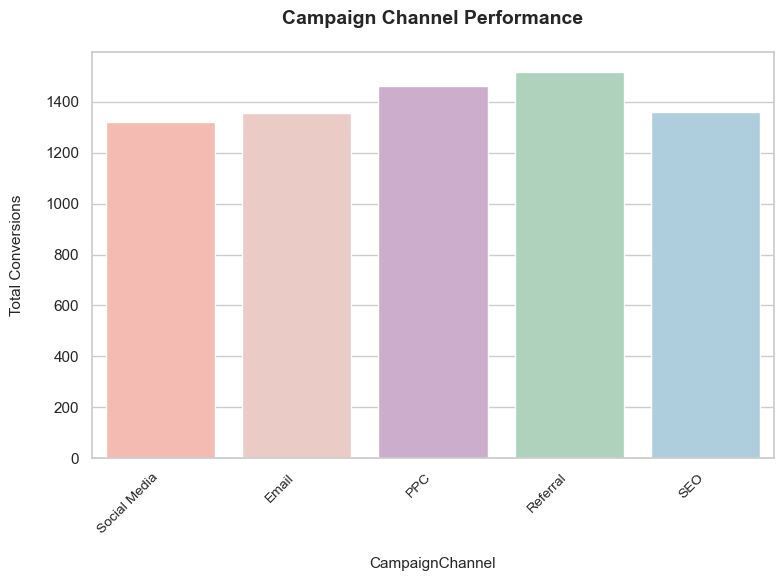

In [113]:
feature = 'CampaignChannel'

converted_customers = df[df['Conversion'] == 1]

custom_palette = ['#FFB3A7', '#F1C6C0', '#D1A8D1', '#A8D8B9', '#A6D1E6']

plt.figure(figsize=(8, 6))
sns.countplot(x=feature, data=converted_customers, palette=custom_palette)

plt.ylabel("Total Conversions", fontsize=11, labelpad=15)
plt.xlabel(feature, fontsize=11, labelpad=15)
plt.title('Campaign Channel Performance', fontsize=14, weight='bold', y=1.05)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**Inferences**<br>
* **Highest** conversion rate is through **Referral** Channel.
* **Social Media** Channel has the **lowest** conversion rate.

### Multivariate Analysis

#### Correlation Matrix of Variables with Conversion


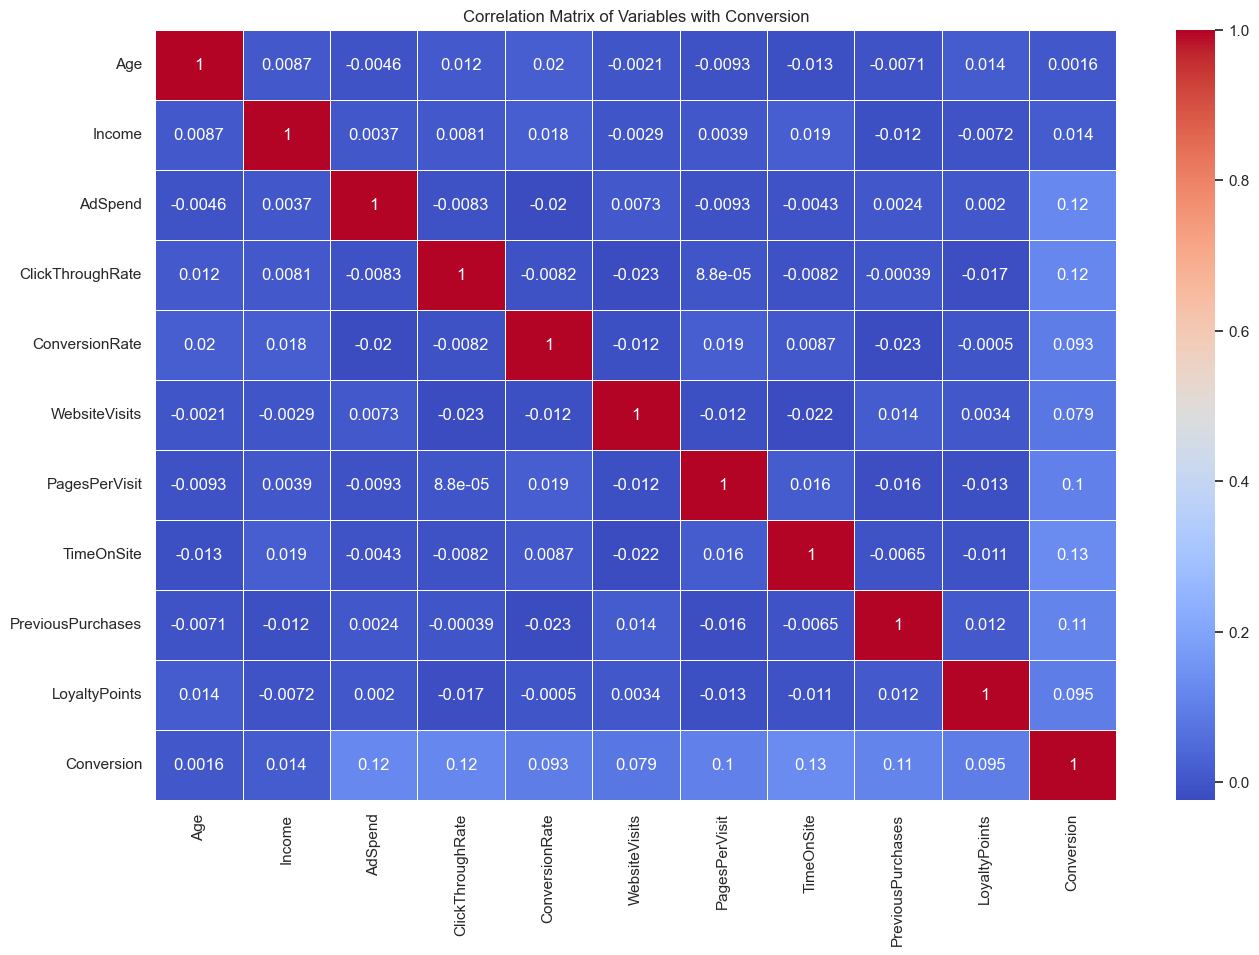

In [118]:
plt.figure(figsize=(15.5, 10))
corr_matrix = df[['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables with Conversion')
plt.show()
     

**Inferences**<br>
* The features **AdSpend**, **ClickThroughRate**, and **TimeOnSite** show the **highest positive** correlations with Conversion, though these correlations are still relatively weak. This suggests that while these factors are associated with higher conversion rates, they are not strong predictors on their own.
* The features **Conversion Rate** and **LoyalityPoint** show **weak** correlations with Conversion suggesting that each variable might contribute uniquely to the conversion prediction, which could be beneficial when building a predictive model.
* Correlation between **PagePerVisit** and **TimeOnSite**  is **positive** but **very low**, suggesting that visiting more pages doesn’t necessarily mean spending more time on the site.
* **PreviousPurchaes** and **LoyaltyPoints** correlation is **positive but weak** suggesting that customers who make previous purchases might accumulate loyalty points, but the relationship is not strong.

* While some variables show positive correlations with conversion, the overall weak correlations imply that no single variable strongly drives conversion on its own. This indicates that a combination of multiple factors is likely necessary to accurately predict conversion, and machine learning models that consider the interactions between these variables may be more effective than relying on any single metric.


**Recommedations**
* **Improve Ad Creatives:** Boost CTR by making ads more engaging.
* **Enhance Website Content:** Encourage more page visits and longer time on site
* **Optimize Email Campaigns:** Increase opens and clicks with better subject lines and email content.
* Focusing on these areas and regularly monitoring the metrics can improve the marketing strategies and drive more conversions, leading to better results for the client

## Data Preprocessing 

### Deciding Variables

In [124]:
x = df.drop(columns=['Conversion','Age Range','Income Range'], axis=1)
y = df['Conversion']

## Converting categorical variables into numerical representations

In [127]:
# cat and num cols
num_cols = x.select_dtypes(exclude='object').columns

# categorical
cat_cols = x.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'CampaignChannel', 'CampaignType'], dtype='object')

### MinMax Scaler to normalize values

In [130]:
# pipelines 
# ohe pipe
cat_vals = Pipeline([
    ("ohe", OneHotEncoder(sparse_output=False, drop='first')),
])

# num values
# scaler pipe
num_vals = Pipeline([
    ("scale", MinMaxScaler())
])

In [132]:
# column transformer, contains ohe and scaler 
preprocess = ColumnTransformer(
    transformers = [
        ("cat_process", cat_vals, cat_cols),
        ("num_process", num_vals, num_cols)
    ]
)

### Splitting the data

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Building

Will build 3 test model on the algorithms:
* Decision Tree
* Random Forest
* Gradient Boosting
* Gradient Boosting Machine - CatBoosting

In [139]:
def fit_results(pipe, x_train, x_test, y_train, y_test):

    """ 
    Function fits pipeline on train data and returns model 
    metrics
    """
    # fit pipeline on train data
    pipe.fit(x_train, y_train)
    y_hat_train = pipe.predict(x_train)
    y_hat_test = pipe.predict(x_test)
    
    # Compute accuracy scores
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)

    # Print accuracy
    print(f"Training Set Accuracy: {train_accuracy:.2f}")
    print(f"Test Set Accuracy: {test_accuracy:.2f}")

    # Create a confusion matrix
    print("Confusion Matrix")
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot(cmap="Blues",colorbar=True)
    plt.show()

    # Get classification report
    report = classification_report(y_test, y_hat_test, target_names=['No', 'Yes'])
    print("Classification Report")
    print("------------------------------------")
    print(report)

As the dataset is bit **imbalance** so tried techniques to balance and see the results- 
1. normal - without any balancing technique 
2. over-sampling technique

#### Normal - without balancing

#### Decision Tree

Training Set Accuracy: 1.00
Test Set Accuracy: 0.83
Confusion Matrix


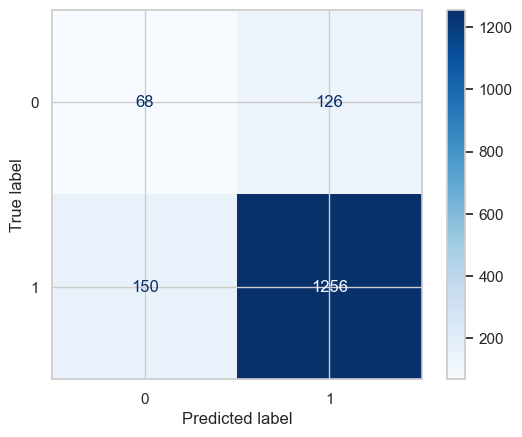

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.31      0.35      0.33       194
         Yes       0.91      0.89      0.90      1406

    accuracy                           0.83      1600
   macro avg       0.61      0.62      0.62      1600
weighted avg       0.84      0.83      0.83      1600



In [144]:
pipe_dt = Pipeline([
    ("preprocess", preprocess),
    ("decisiontree", DecisionTreeClassifier(random_state=42))
])
fit_results(pipe_dt, x_train, x_test, y_train, y_test)

**Inferences** 
* In this model, there is a **high percentage** of Yes but very **low percentage** of No suggesting a class imbalance in the model.
* From the Confusion metrics we can infer that model is **not** able the identify the **Non-Converted users correctly** due to which there is also **high** number of **Type 1 and Type 2 errors**
* The performance of this model **lags slightly**

#### Random Forest

Training Set Accuracy: 1.00
Test Set Accuracy: 0.89
Confusion Matrix


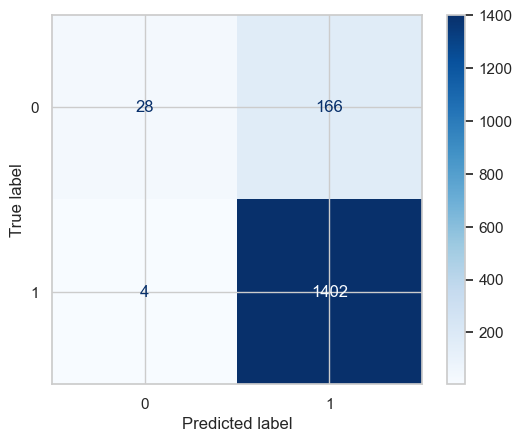

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.88      0.14      0.25       194
         Yes       0.89      1.00      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.88      0.57      0.60      1600
weighted avg       0.89      0.89      0.86      1600



In [148]:
pipe_rf = Pipeline([
    ("preprocess", preprocess),
    ("randomforest" ,RandomForestClassifier(n_estimators=100, random_state=42) )
])
fit_results(pipe_rf, x_train, x_test, y_train, y_test)

**Inferences**<br>
* In this model, there is a **little improvement** in the accuracy than Decision Tree model but we don't take that in consideration as their is a class imbalance.
* The Non Converted Customers are **very low** and there is **huge difference** between the Precision and Recall, making the F1 Score **low**.
* The **FP** is **high** telling us that the model is **not performing well** in predicting the Converted Customers correctly.

#### Gradient Boosting 

Training Set Accuracy: 0.94
Test Set Accuracy: 0.92
Confusion Matrix


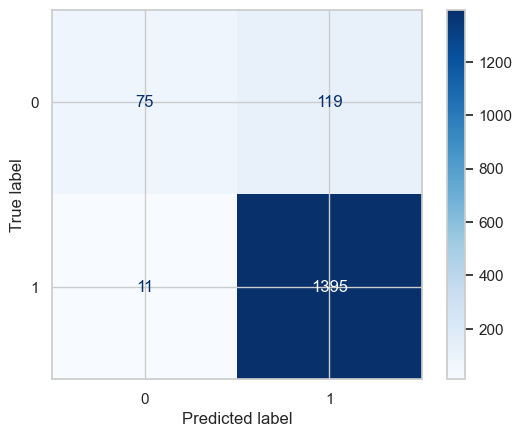

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.87      0.39      0.54       194
         Yes       0.92      0.99      0.96      1406

    accuracy                           0.92      1600
   macro avg       0.90      0.69      0.75      1600
weighted avg       0.92      0.92      0.90      1600



In [151]:
pipe_gb = Pipeline([
    ("preprocess", preprocess),
    ("gradientboosting" ,GradientBoostingClassifier(random_state=42))
])
fit_results(pipe_gb, x_train, x_test, y_train, y_test)

**Inferences**<br>
* This model has **improved** from the previous ones in all aspects, still their is a **little imbalance** in identifying non converted customers
* There is a **better** balance between Precision and Recall, **improving** the F1 score
* The model is improving in identifying the Converted and Non-Converted customers, with a reduction in **FP** but little increase in **FN**

#### Catboosting

Training Set Accuracy: 1.00
Test Set Accuracy: 0.93
Confusion Matrix


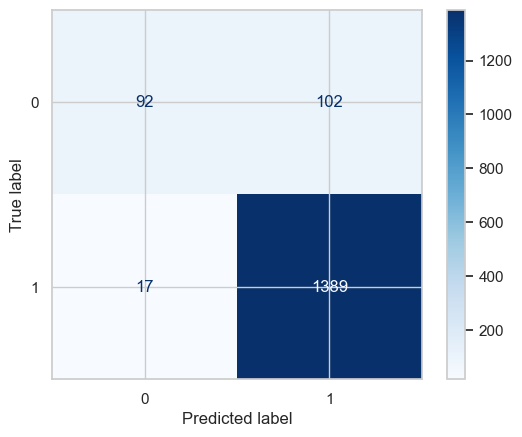

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.84      0.47      0.61       194
         Yes       0.93      0.99      0.96      1406

    accuracy                           0.93      1600
   macro avg       0.89      0.73      0.78      1600
weighted avg       0.92      0.93      0.92      1600



In [155]:
pipe_cb = Pipeline([
    ("preprocess", preprocess),
    ("catboosting" ,CatBoostClassifier(iterations=1000,learning_rate=0.1,depth=6,verbose=0,random_state=42))
])
fit_results(pipe_cb, x_train, x_test, y_train, y_test)

**Inferences**<br>
* This model has performed the **best** in comparison to the above, improving the imbalances.
* The F1 Score has also **improved** for Non Converted customers also 
* Precision has decreased but Recall has increased

#### Precision - Recall Curve for All the Models 

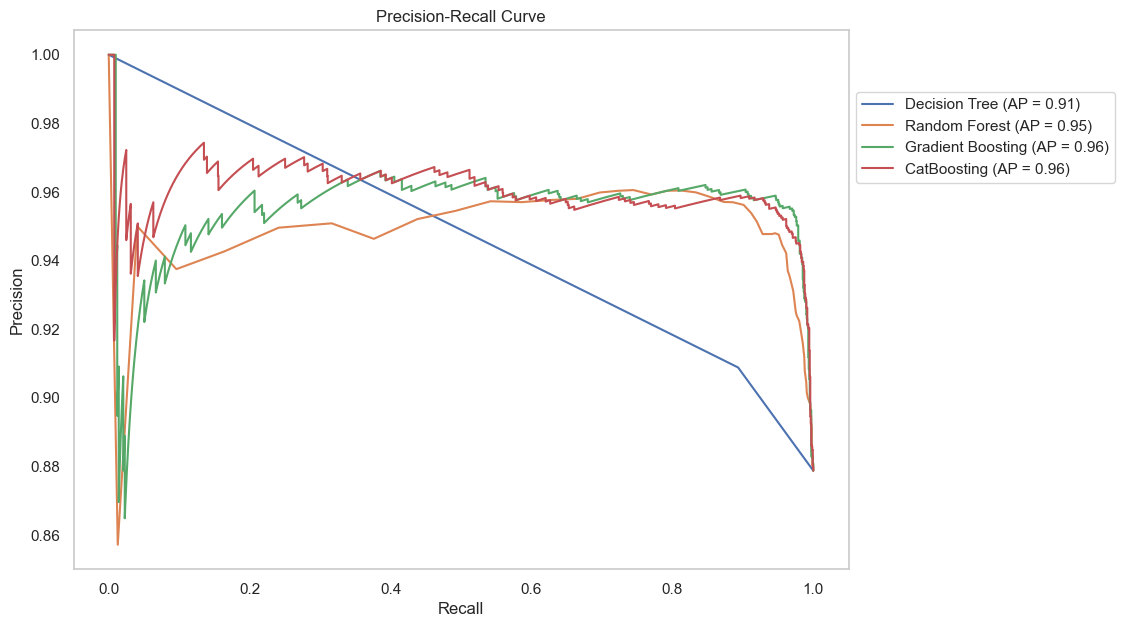

In [158]:
def plot_pr_curves(models, x_train, x_test, y_train, y_test):
    """
    Function to fit models, compute precision-recall curves, 
    and plot them for comparison.
    """
    plt.figure(figsize=(10, 7))
    
    for name, model in models:
        # Fit the pipeline
        model.fit(x_train, y_train)
        # Predict probabilities for the positive class
        y_probs = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1
        # Compute precision-recall curve
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        # Compute average precision score
        avg_precision = average_precision_score(y_test, y_probs)
        # Plot the curve
        plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")
    
    # Finalize the plot
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left",bbox_to_anchor=(1, 0.9))
    plt.grid()
    plt.show()

# Define pipelines for the models
models = [
    ("Decision Tree", Pipeline([
        ("preprocess", preprocess),
        ("decisiontree", DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline([
        ("preprocess", preprocess),
        ("randomforest", RandomForestClassifier(n_estimators=100, random_state=42))
    ])),
    ("Gradient Boosting", Pipeline([
        ("preprocess", preprocess),
        ("gradientboosting", GradientBoostingClassifier(random_state=42))
    ])),
    ("CatBoosting", Pipeline([
        ("preprocess", preprocess),
        ("catboosting", CatBoostClassifier(
            iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42))
    ])),
]

# Plot the PR curves
plot_pr_curves(models, x_train, x_test, y_train, y_test)

**Inferences**<br>
* CatBoosting has the **highest** AP (0.96), followed by Gradient Boosting (0.96), Random Forest (0.95), and then Decision Tree (0.91). This means CatBoost and Gradient Boosting are better at maintaining high precision and recall simultaneously.
* As **High recall** is likely more critical since missing potential conversions could mean lost revenue,**CatBoosting or Gradient Boosting** should be preferred, given their higher performance across recall values.

#### Over Sampling 

#### Decisiom Tree

Training Set Accuracy: 1.00
Test Set Accuracy: 0.74
Confusion Matrix


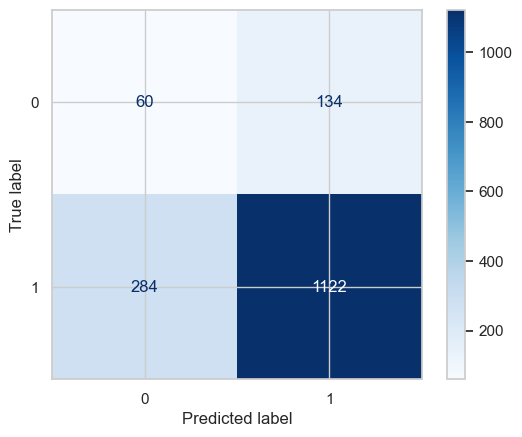

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.17      0.31      0.22       194
         Yes       0.89      0.80      0.84      1406

    accuracy                           0.74      1600
   macro avg       0.53      0.55      0.53      1600
weighted avg       0.81      0.74      0.77      1600



In [162]:
pipe_dt_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("decisiontree", DecisionTreeClassifier(random_state=42))
])
fit_results(pipe_dt_smote, x_train, x_test, y_train, y_test)

**Inferences**<br>
* Since there was imbalance we applied SMOTE but SMOTE introduced **more noise**, leading to lower accuracy and worse performance for both classes.
* Precision, recall, and F1-score for the Non Converted Customers all dropped significantly, meaning the model misclassified more cases.

#### Random Forest 

Training Set Accuracy: 1.00
Test Set Accuracy: 0.88
Confusion Matrix


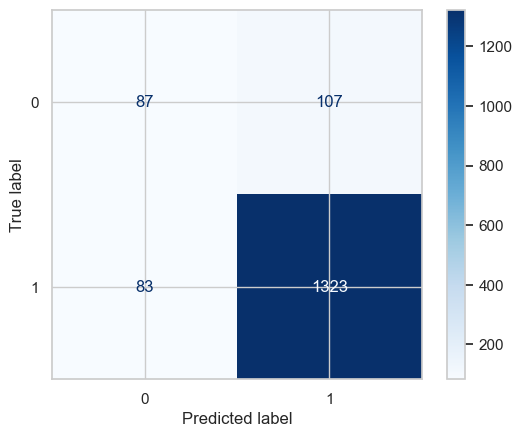

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.51      0.45      0.48       194
         Yes       0.93      0.94      0.93      1406

    accuracy                           0.88      1600
   macro avg       0.72      0.69      0.71      1600
weighted avg       0.88      0.88      0.88      1600



In [165]:
pipe_rf_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("randomforest" ,RandomForestClassifier(n_estimators=100, random_state=42))
])
fit_results(pipe_rf_smote, x_train, x_test, y_train, y_test)

**Inferences**
* This model has **significantly improved** from the previous one after SMOTE.
* There is a better F1 Score and other parameters

#### Gradient Boosting

Training Set Accuracy: 0.91
Test Set Accuracy: 0.86
Confusion Matrix


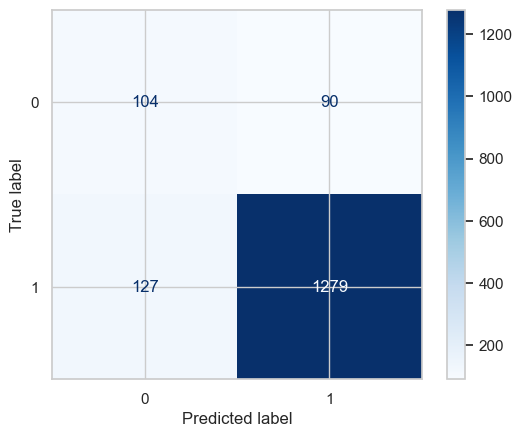

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.45      0.54      0.49       194
         Yes       0.93      0.91      0.92      1406

    accuracy                           0.86      1600
   macro avg       0.69      0.72      0.71      1600
weighted avg       0.88      0.86      0.87      1600



In [169]:
pipe_gb_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("gradientboosting" ,GradientBoostingClassifier(random_state=42))
])
fit_results(pipe_gb_smote, x_train, x_test, y_train, y_test)

**Inferences**
* The **F1 Score** has **improved** maintaining balance between Precision and Recall.
* **FN** has increased little bit which might be a problem , but model is able to **identify** the customers correctly 

#### CatBoosting

Training Set Accuracy: 1.00
Test Set Accuracy: 0.92
Confusion Matrix


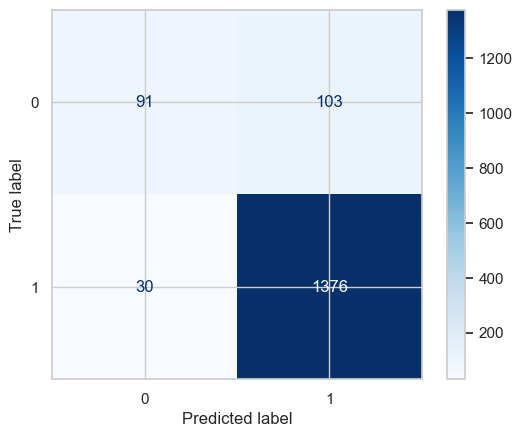

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.75      0.47      0.58       194
         Yes       0.93      0.98      0.95      1406

    accuracy                           0.92      1600
   macro avg       0.84      0.72      0.77      1600
weighted avg       0.91      0.92      0.91      1600



In [172]:
pipe_cb_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("catboosting" ,CatBoostClassifier(iterations=1000,learning_rate=0.1,depth=6,verbose=0,random_state=42))
])
fit_results(pipe_cb_smote, x_train, x_test, y_train, y_test)

**Inferences**<br>
* This model has performed the **best** after SMOTE in all metrices.
* Recall has also **decreased** and there is a better balance of it with Precision.

#### Precision - Recall Curve for All the Models With SMOTE

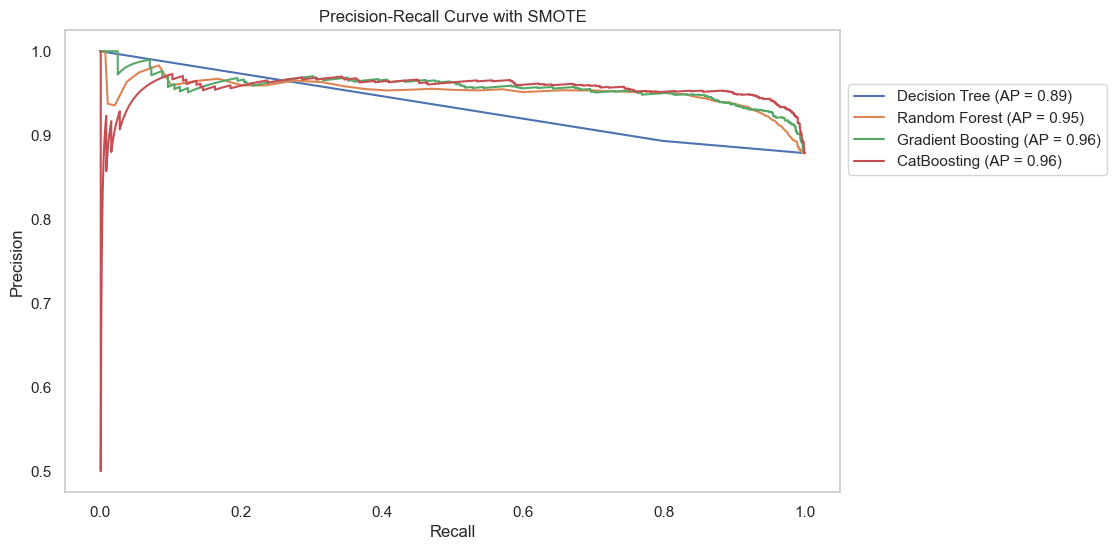

In [175]:
# Function to plot Precision-Recall Curves
def plot_precision_recall_curves_smote(pipes, model_names, x_test, y_test):
    plt.figure(figsize=(10, 6))
    
    for pipe, model_name in zip(pipes, model_names):
        # Fit the pipeline
        pipe.fit(x_train, y_train)
        # Get predicted probabilities for the positive class
        y_scores = pipe.predict_proba(x_test)[:, 1]
        # Calculate Precision, Recall, and Average Precision
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        avg_precision = average_precision_score(y_test, y_scores)
        # Plot the Precision-Recall curve
        plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")
    
    # Finalize plot
    plt.title("Precision-Recall Curve with SMOTE")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left",bbox_to_anchor=(1, 0.9))
    plt.grid()
    plt.show()

# Define pipelines for the models
pipe_dt_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("decisiontree", DecisionTreeClassifier(random_state=42))
])

pipe_rf_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("randomforest", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe_gb_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("gradientboosting", GradientBoostingClassifier(random_state=42))
])

pipe_cb_smote = ImbPipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("catboosting", CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42))
])

# List of pipelines and corresponding model names
pipes_smote = [pipe_dt_smote, pipe_rf_smote, pipe_gb_smote, pipe_cb_smote]
model_names_smote = ["Decision Tree", "Random Forest", "Gradient Boosting", "CatBoosting"]

# Plot the Precision-Recall Curves
plot_precision_recall_curves_smote(pipes_smote, model_names_smote, x_test, y_test)

**Inferences**<br>
* **CatBoosting and GradientBoosting** models **excel** due to their ability to capture non-linear patterns and handle complex feature interactions. Their higher AP values and curve shapes show they balance precision and recall well.
* **Random Forest** erforms well (AP = 0.95), it slightly underperforms compared to boosting models because it might be less optimized for feature weighting or minority class sensitivity.
* **Decision Tree**  lacks the robustness of ensemble methods, leading to poorer precision and recall across thresholds.


### Conclusion

* **Top Performers:** **CatBoostClassifier** stands out as the best model with the highest accuracy and balanced performance across both classes, making it ideal for scenarios where both precision and recall are critical.
* **CatBoostClassifier** performs well keeping in mind the objective of the project which is accurately predict whether a customer will convert based on demographic and engagement features. This was applied by giving more importance to **Recall**.<br>
* **Areas for Improvement:** The DecisionTreeClassifier, RandomForestClassifier, and GradientBoostingClassifier perform well but have difficulty predicting non-converted customers (class 0). Further fine-tuning or feature engineering could improve their overall effectiveness.

### Limitations

* While **CatBoosting** performs exceptionally well in both cases i.e with or without SMOTE, it is not without limitations:<br>**Overfitting Risk:** As a powerful ensemble method, CatBoost can overfit to the training data if not properly tuned or if the data is noisy. This could lead to reduced performance on unseen data.

### Recommendations

Actionable Insights and Next Steps<br>
Given the model’s strong performance, i recommend proceeding with deploying the CatBoost model with the following considerations:<br>
* **Regular Monitoring:** Implement continuous monitoring of model performance to detect and address any decline in accuracy, particularly due to data drift or unforeseen biases.* **Business Integration:** Work closely with stakeholders to integrate model predictions into business processes, ensuring that the model's outputs are used effectively to drive decisions.
* Use advanced techniques like **ADASYN** and **SMOTE-Tomek Links** to reduce noise..

## Saving CatBoost Model

In [194]:
# Save CatBoost model (without SMOTE)
joblib.dump(pipe_cb, "catboost_model.pkl")
print("✅ CatBoost model saved successfully!")

# Save CatBoost model (with SMOTE)
joblib.dump(pipe_cb_smote, "catboost_smote_model.pkl")
print("✅ CatBoost model (SMOTE) saved successfully!")

✅ CatBoost model saved successfully!
✅ CatBoost model (SMOTE) saved successfully!


## Loading CatBoost Model

In [197]:
# Load the saved CatBoost model (without SMOTE)
loaded_cb = joblib.load("catboost_model.pkl")

# Load the saved CatBoost model (with SMOTE)
loaded_cb_smote = joblib.load("catboost_smote_model.pkl")

# Make predictions using the loaded model
predictions = loaded_cb.predict(x_test)
print(predictions)

[1 1 1 ... 1 1 1]
